<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/main/yolov8/01_yolo_v8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Train


## Imports and GPU Check

Check access to GPU.

In [1]:
!pip install nvidia-cuda-runtime-cu12
!pip install cuda-python

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

!pip install roboflow
!pip install -U ultralytics

!pip install python-dotenv
!pip install pickleshare

!nvidia-smi


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in links: https://download.pytorch.org/whl/torch_stable.html



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached ultralytics-8.1.8-py3-none-any.whl.metadata (40 kB)
Using cached ultralytics-8.1.8-py3-none-any.whl (709 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Thu Feb  1 01:16:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   51C    P8              28W / 240W |   1091MiB /  8192MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import dotenv

In [3]:
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


## Get Environment Variables from drive


Load the .env file

In [4]:
dotenv.load_dotenv('../yolov8_local/yolov8.env')

True

In [5]:
ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 634.2/1862.2 GB disk)


## Model

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sea-turtles-1 in yolov8:: 100%|██████████| 2728/2728 [00:00<00:00, 3017.13it/s]


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for 150 epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [8]:
#model = YOLO(f'{HOME}/models/yolov8n.pt')
#model = YOLO(f'{HOME}/models/yolov8s.pt')
model = YOLO(f'{HOME}/models/yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 75.8MB/s]


In [9]:
print(dataset.location)
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1
c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


In [10]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)


True
1
12.1


In [11]:
!yolo checks



Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 634.3/1862.2 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.11.7
Install             git
RAM                 31.93 GB
CPU                 AMD Ryzen 5 5600X 6-Core Processor
CUDA                12.1

matplotlib          ✅ 3.8.1>=3.3.0
numpy               ✅ 1.26.1>=1.22.2
opencv-python       ✅ 4.8.1.78>=4.6.0
pillow              ✅ 10.1.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.6
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.2>=1.1.4
seaborn             ✅ 0.13.0>=0.11.0


Go to sea-turtles-1/data.yaml, and update the last 2 lines to:

```yaml
train: ../train/images
val: ../valid/images
```


In [12]:
!yolo cfg={HOME}/cfg/cfg_medium_train.yaml

^C


In [12]:
#!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=400 imgsz=800 plots=True device=0 patience=50 verbose=True

Ultralytics YOLOv8.0.209  Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1/data.yaml, epochs=400, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [26]:
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


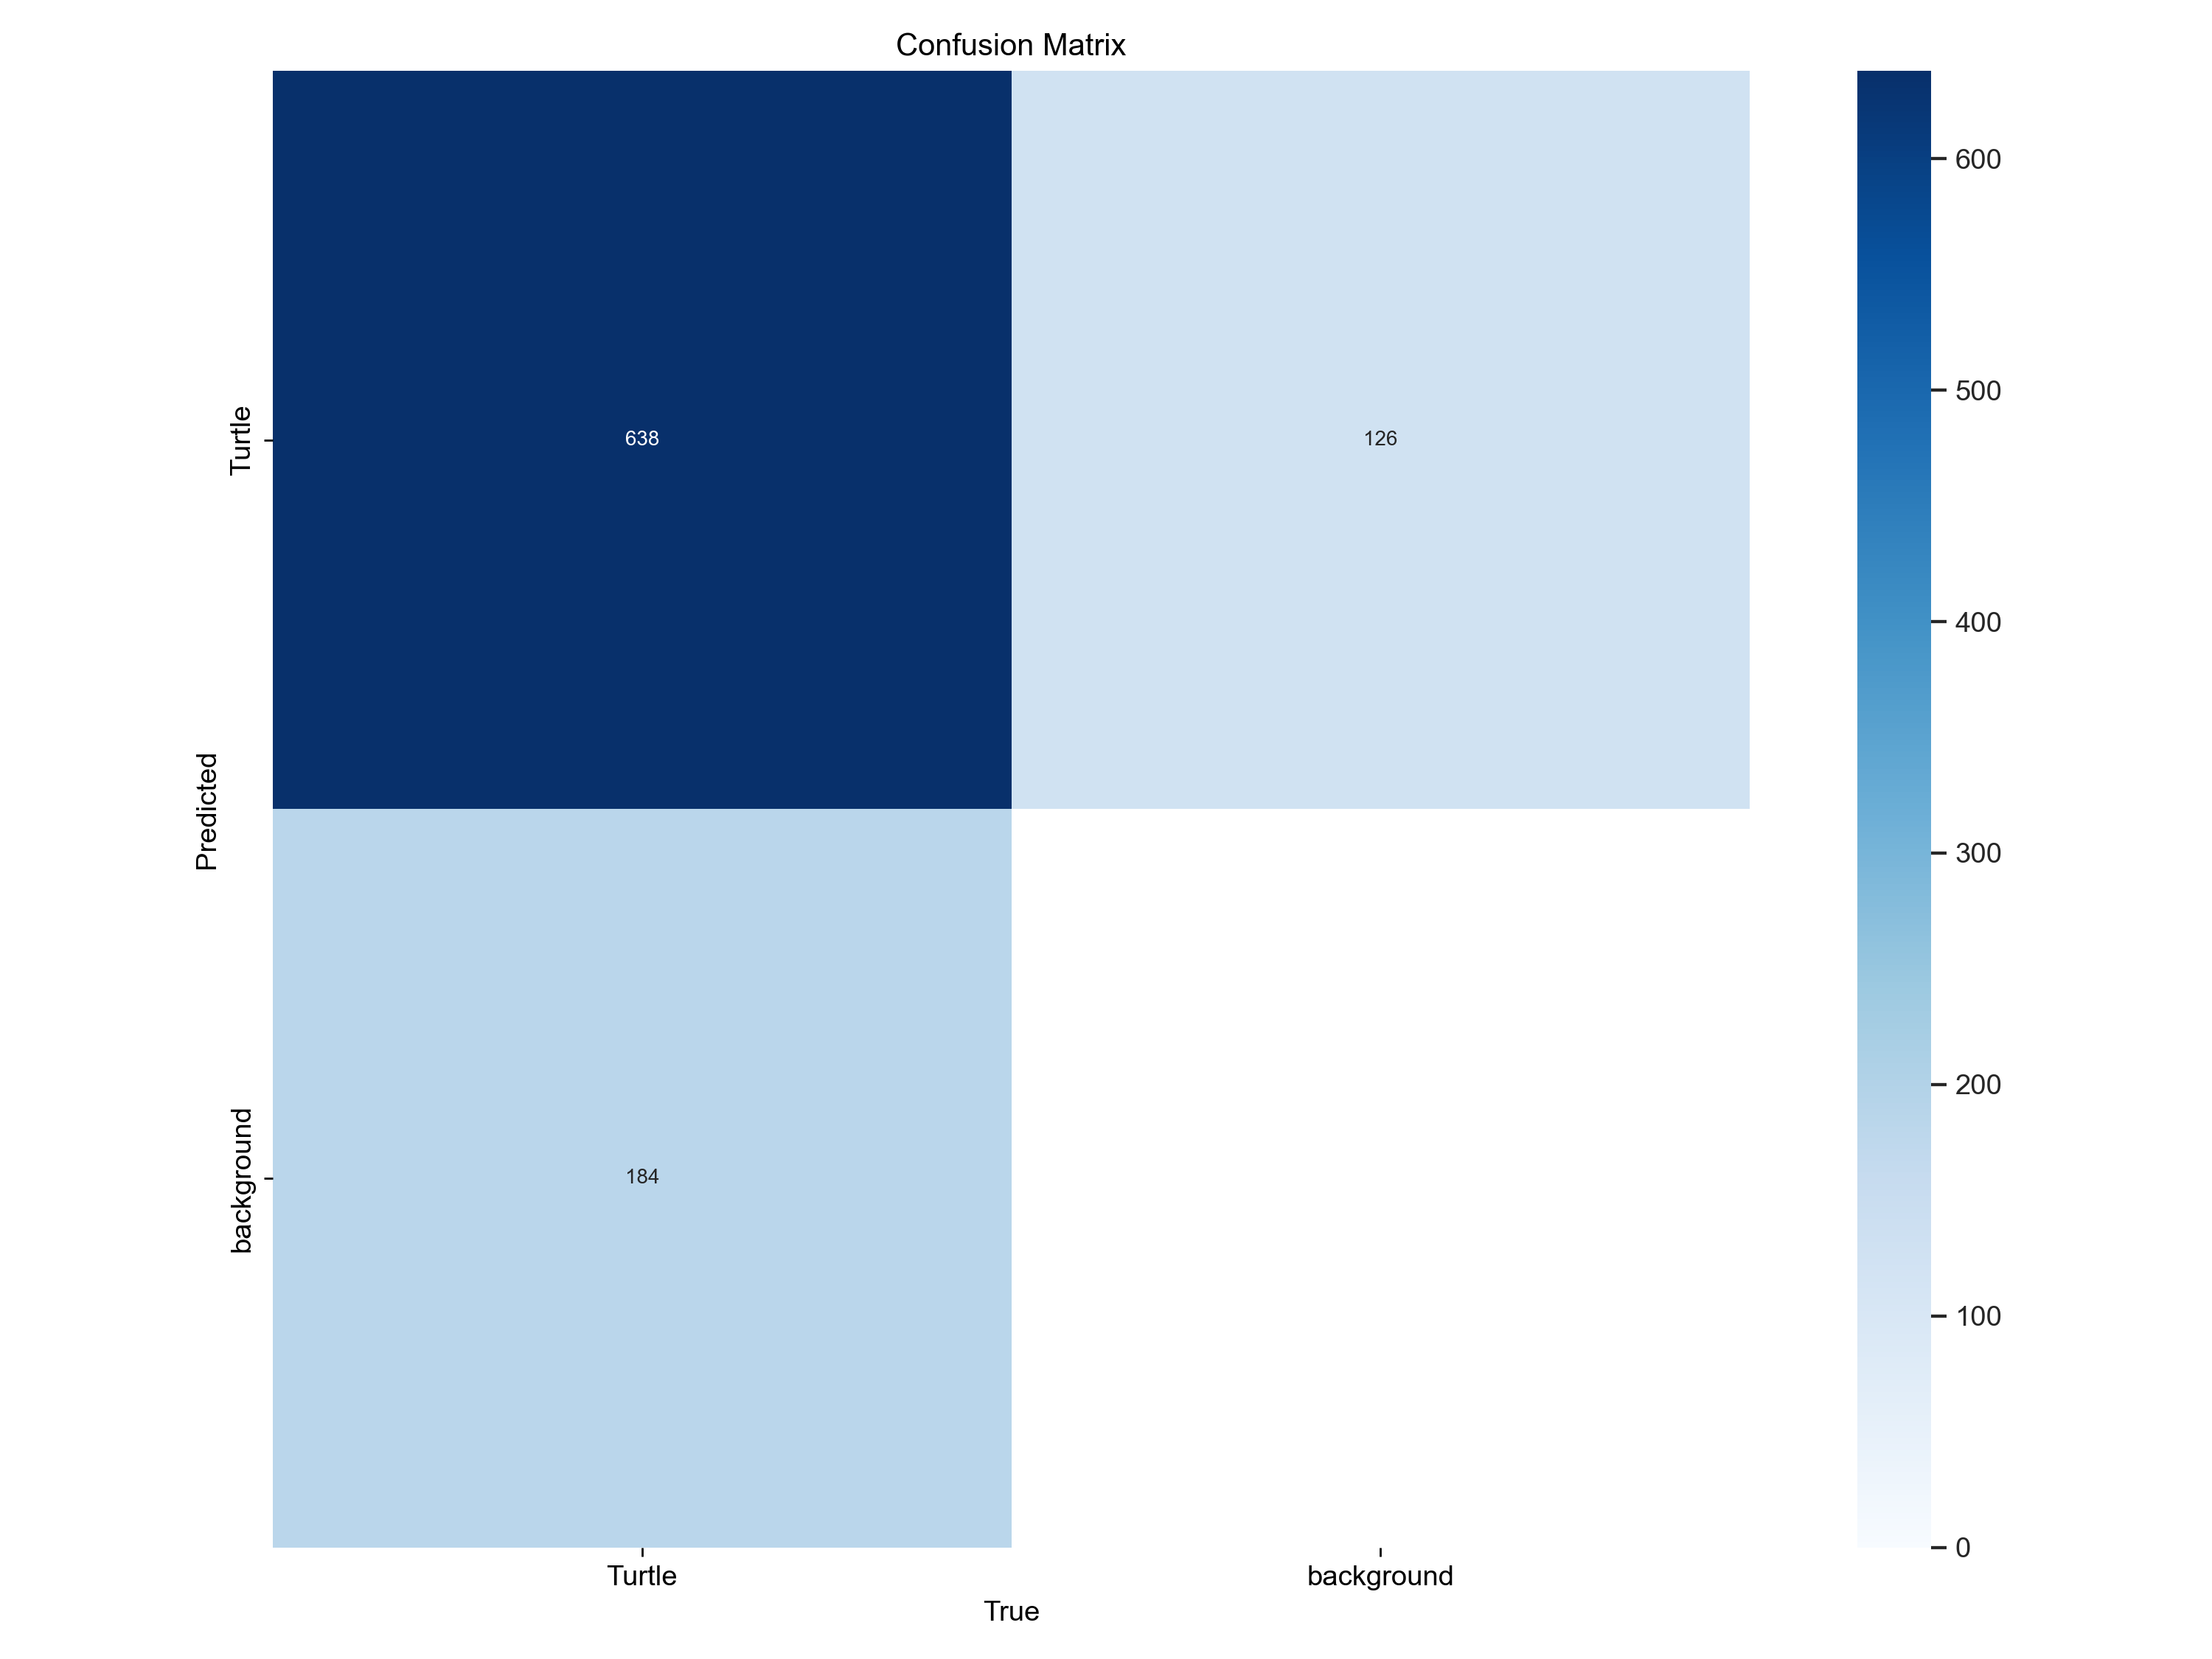

In [29]:
%cd {HOME}
Image(filename=f'./runs/detect/train2/confusion_matrix.png', width=600)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


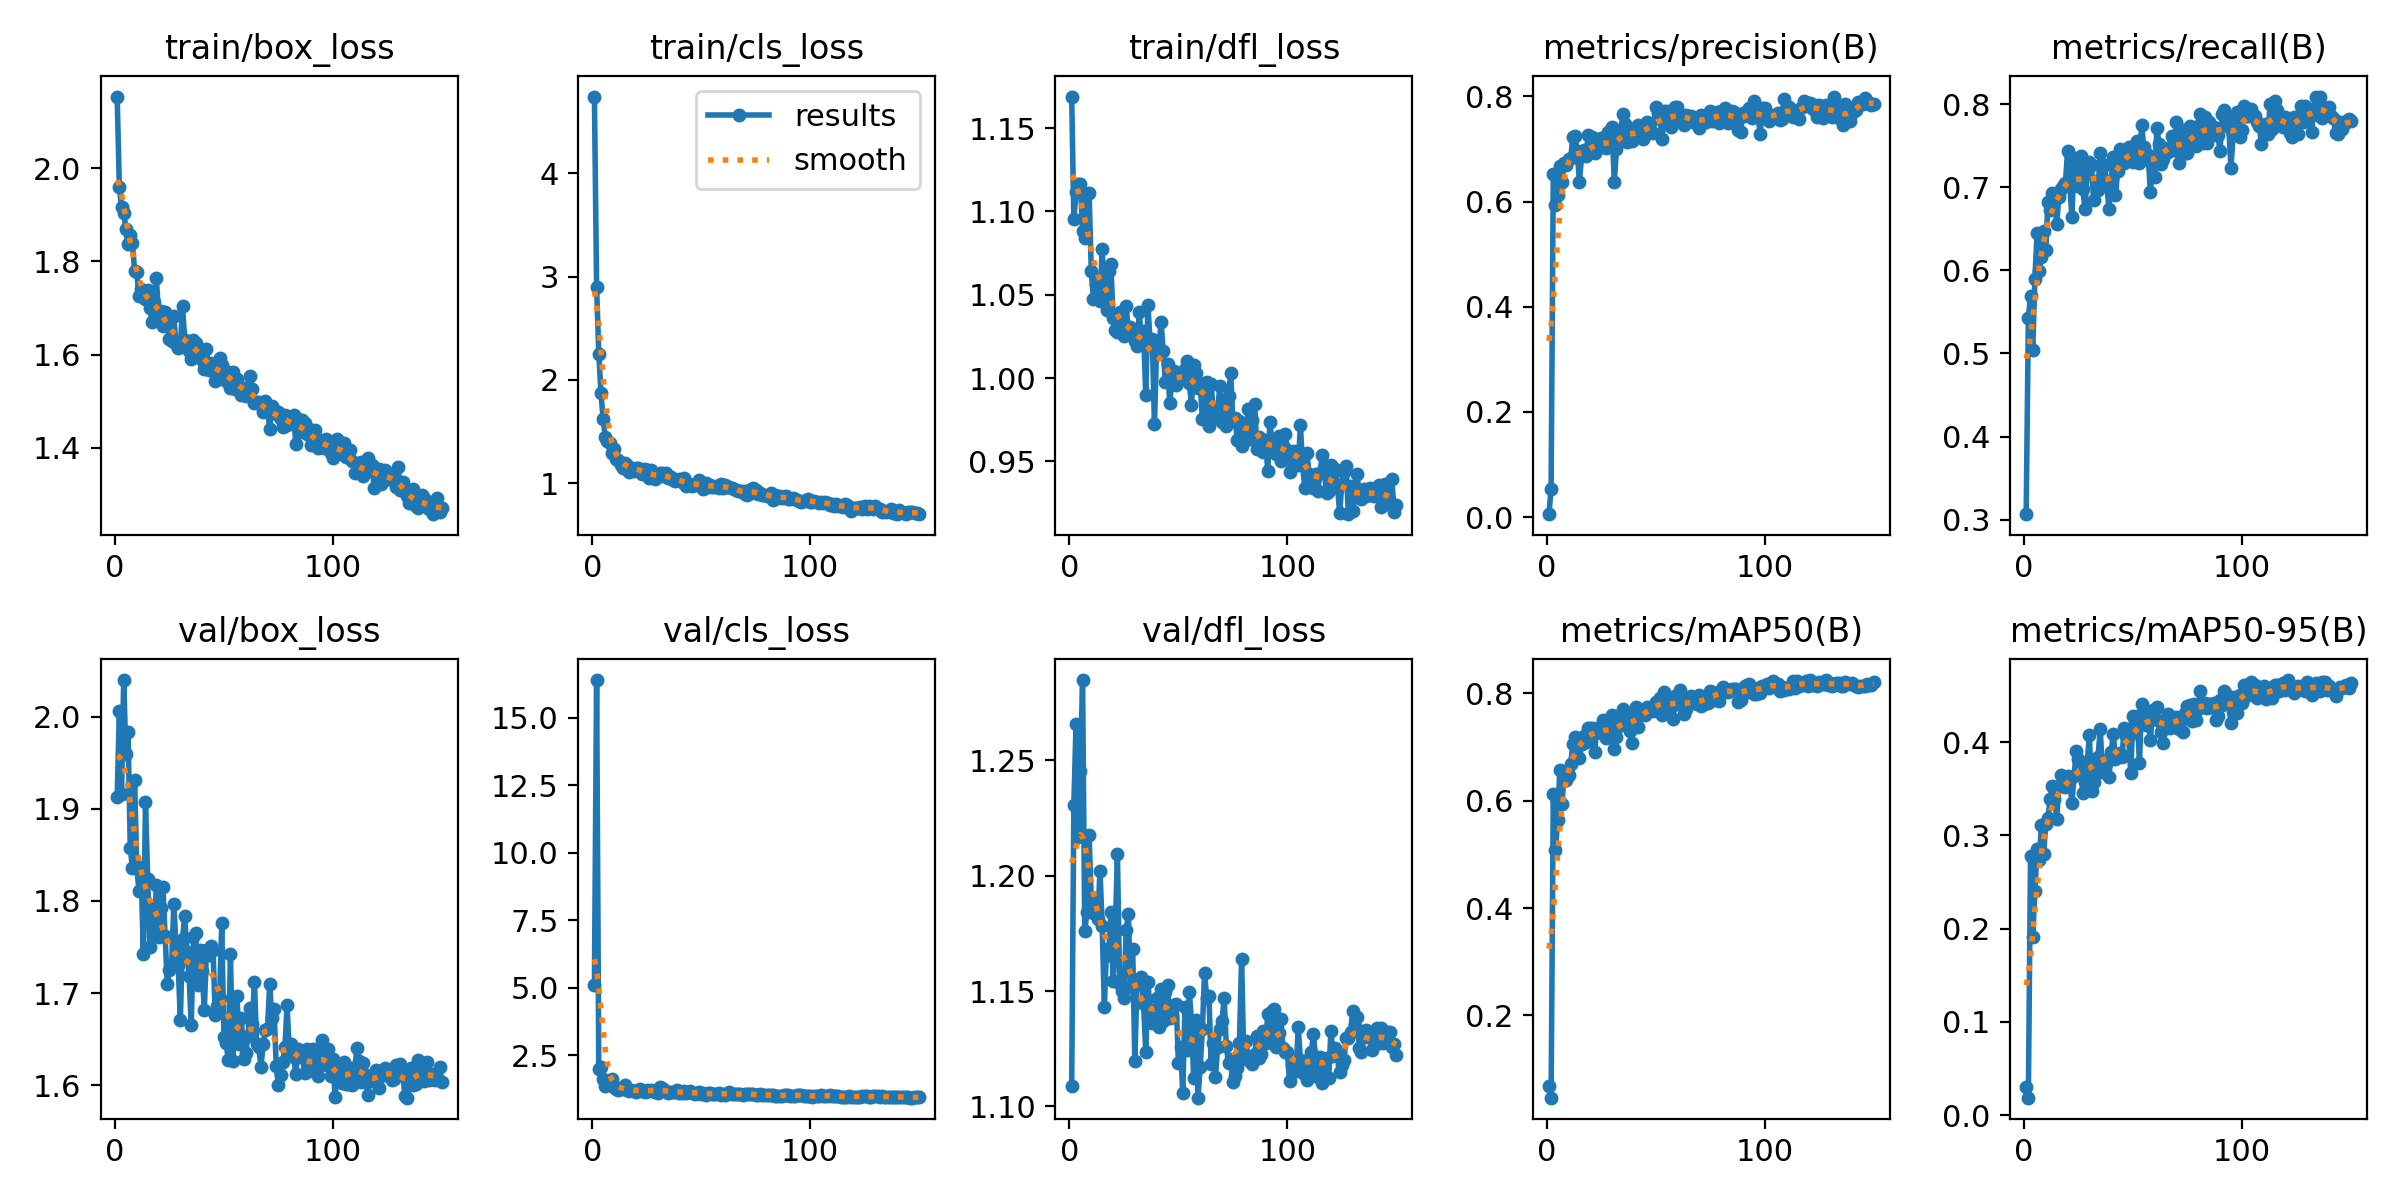

In [30]:
%cd {HOME}
Image(filename=f'./runs/detect/train2/results.png', width=600)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


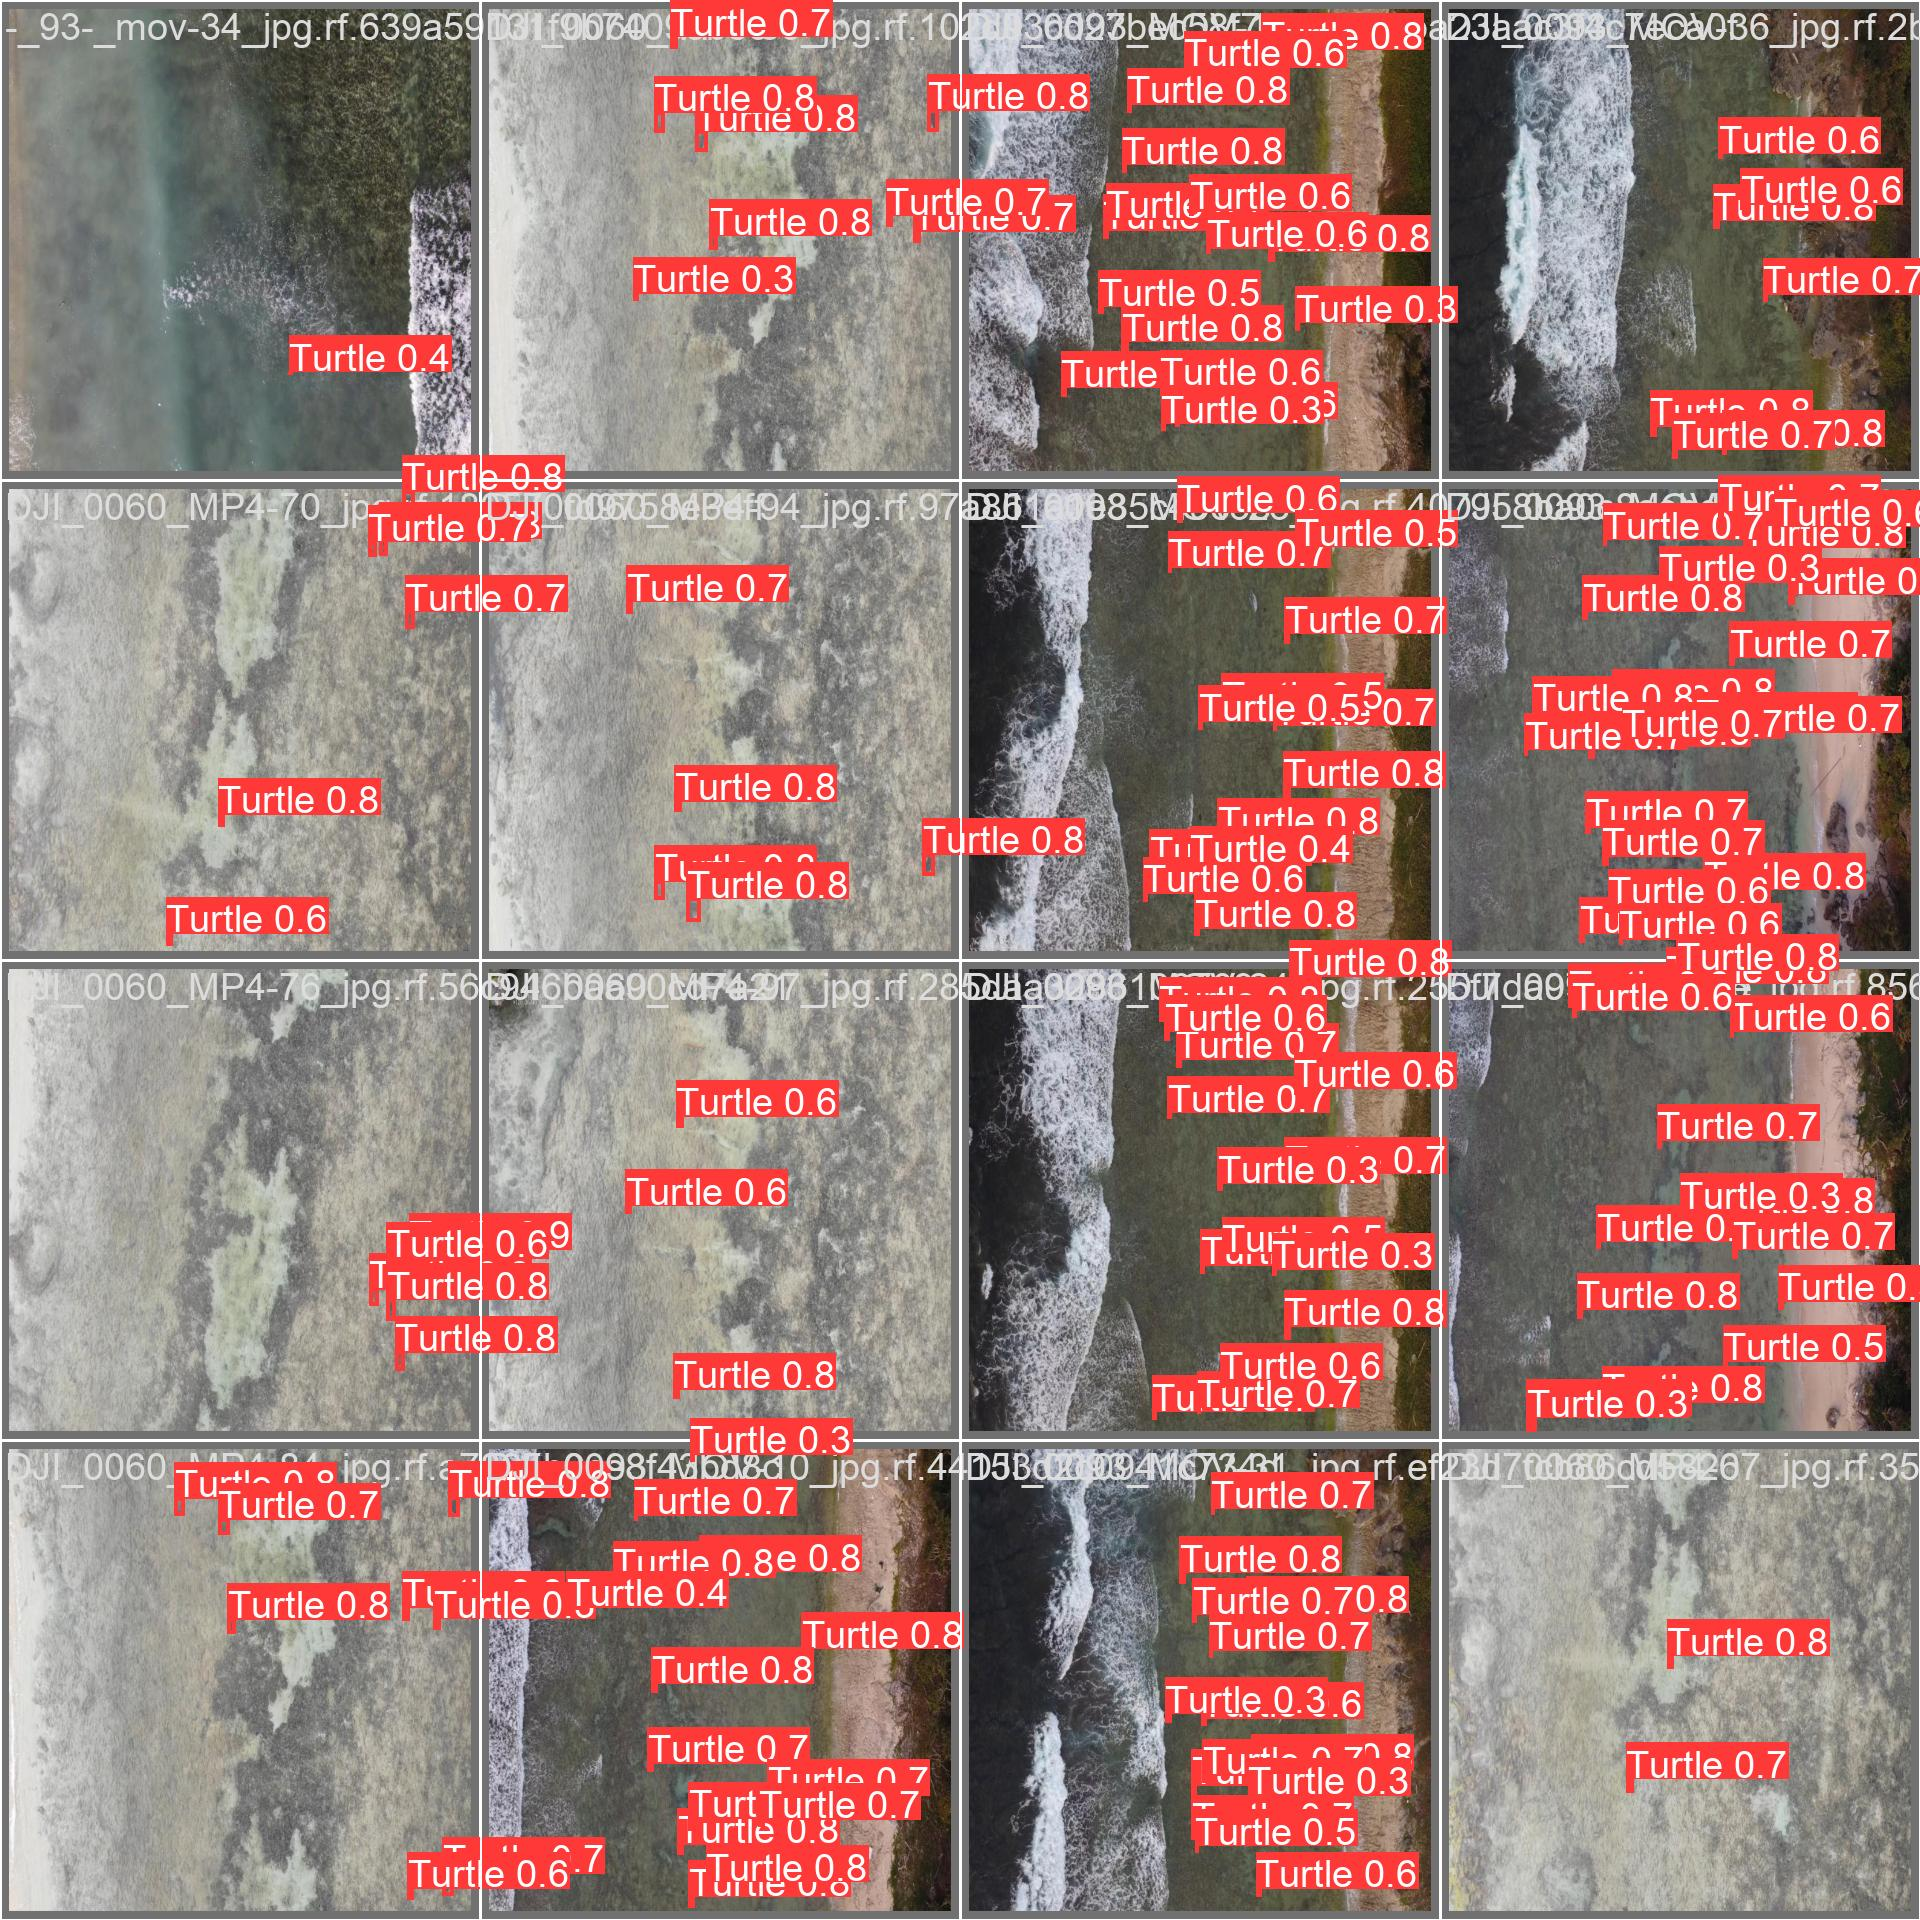

In [31]:
%cd {HOME}
Image(filename=f'./runs/detect/train2/val_batch0_pred.jpg', width=600)